<a href="https://colab.research.google.com/github/adityasahu88/ML_PROJECTS/blob/main/WINE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Wine dataset is a popular dataset for classification tasks. It contains chemical analysis results of wines grown in the same region in Italy but derived from three different cultivars (varieties). It is used in various machine learning tasks to classify the wines based on their features.

**Dataset Description:**

The Wine dataset consists of 13 numerical features derived from chemical analyses of wines. These features include attributes like alcohol content, malic acid, ash content, alkalinity, magnesium, and other chemical compounds.

The dataset has 3 classes (types of wines), with 178 instances in total.

**Features:**
- Alcohol
- Malic acid
- Ash
- Alcalinity of ash
- Magnesium
- Total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280/OD315 of diluted wines
- Proline (an amino acid)

The target variable is the wine type (3 classes).

In [26]:
# import the Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [27]:
wine = load_wine()
# Access the features and target
X = wine.data  # Features
y = wine.target  # Target labels
target_names = wine.target_names  # Class names
target_names = target_names
feature_names = wine.feature_names # Feature names

# COnvert to Dataframe
df =pd.DataFrame(X,columns=feature_names)
df['target']=y

In [28]:
# Load the Dataset with sample 10 records
df.head(10)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0


In [29]:

# Shape of the Dataset
print(df.shape)

(178, 14)


In [30]:

# Describe the Dataset
df.describe()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [31]:

# Information about the Dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [32]:

# Check for Missing Values
print(df.isnull().sum())


alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64


In [33]:

# Check for Duplicates
print(df.duplicated().sum())


0


In [34]:

# Check for Class Imbalance
print(df['target'].value_counts())

target
1    71
0    59
2    48
Name: count, dtype: int64


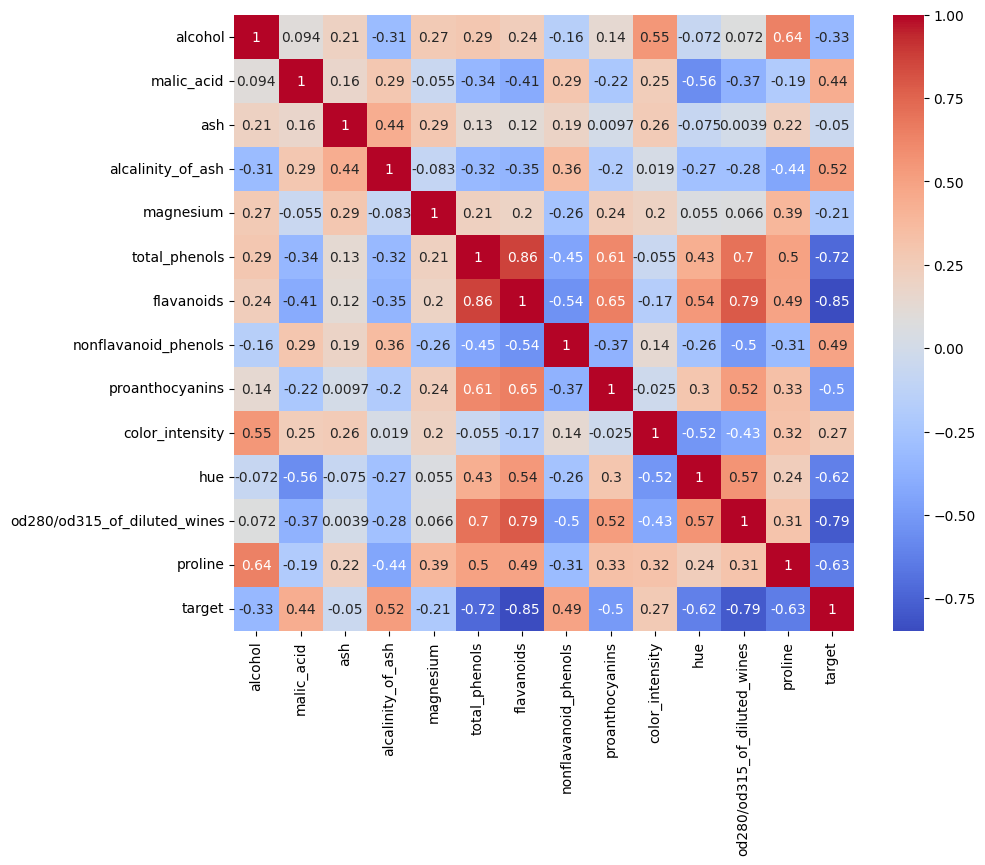

In [35]:
# Lets Visualize the data in for More EDA
# Correlation factor

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()



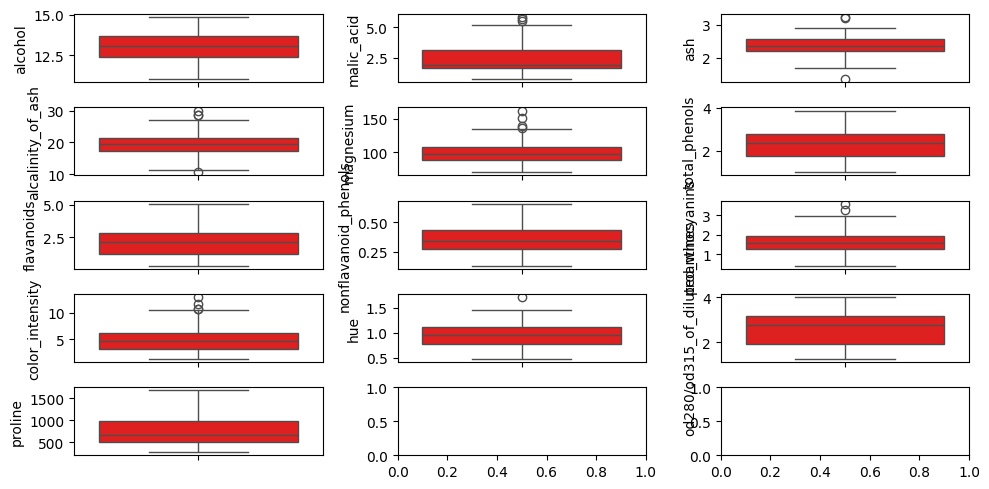

In [36]:
# visual outliers in each features
no_of_features = len(feature_names)
no_columns=3
no_rows=np.ceil(no_of_features/no_columns)
no_rows =int(no_rows)
plt.subplots(no_rows,no_columns,figsize=(10,5))
for i,feature in enumerate(feature_names):
  plt.subplot(no_rows,no_columns,i+1)
  sns.boxplot(df[feature],color='red')
plt.tight_layout()
plt.show()

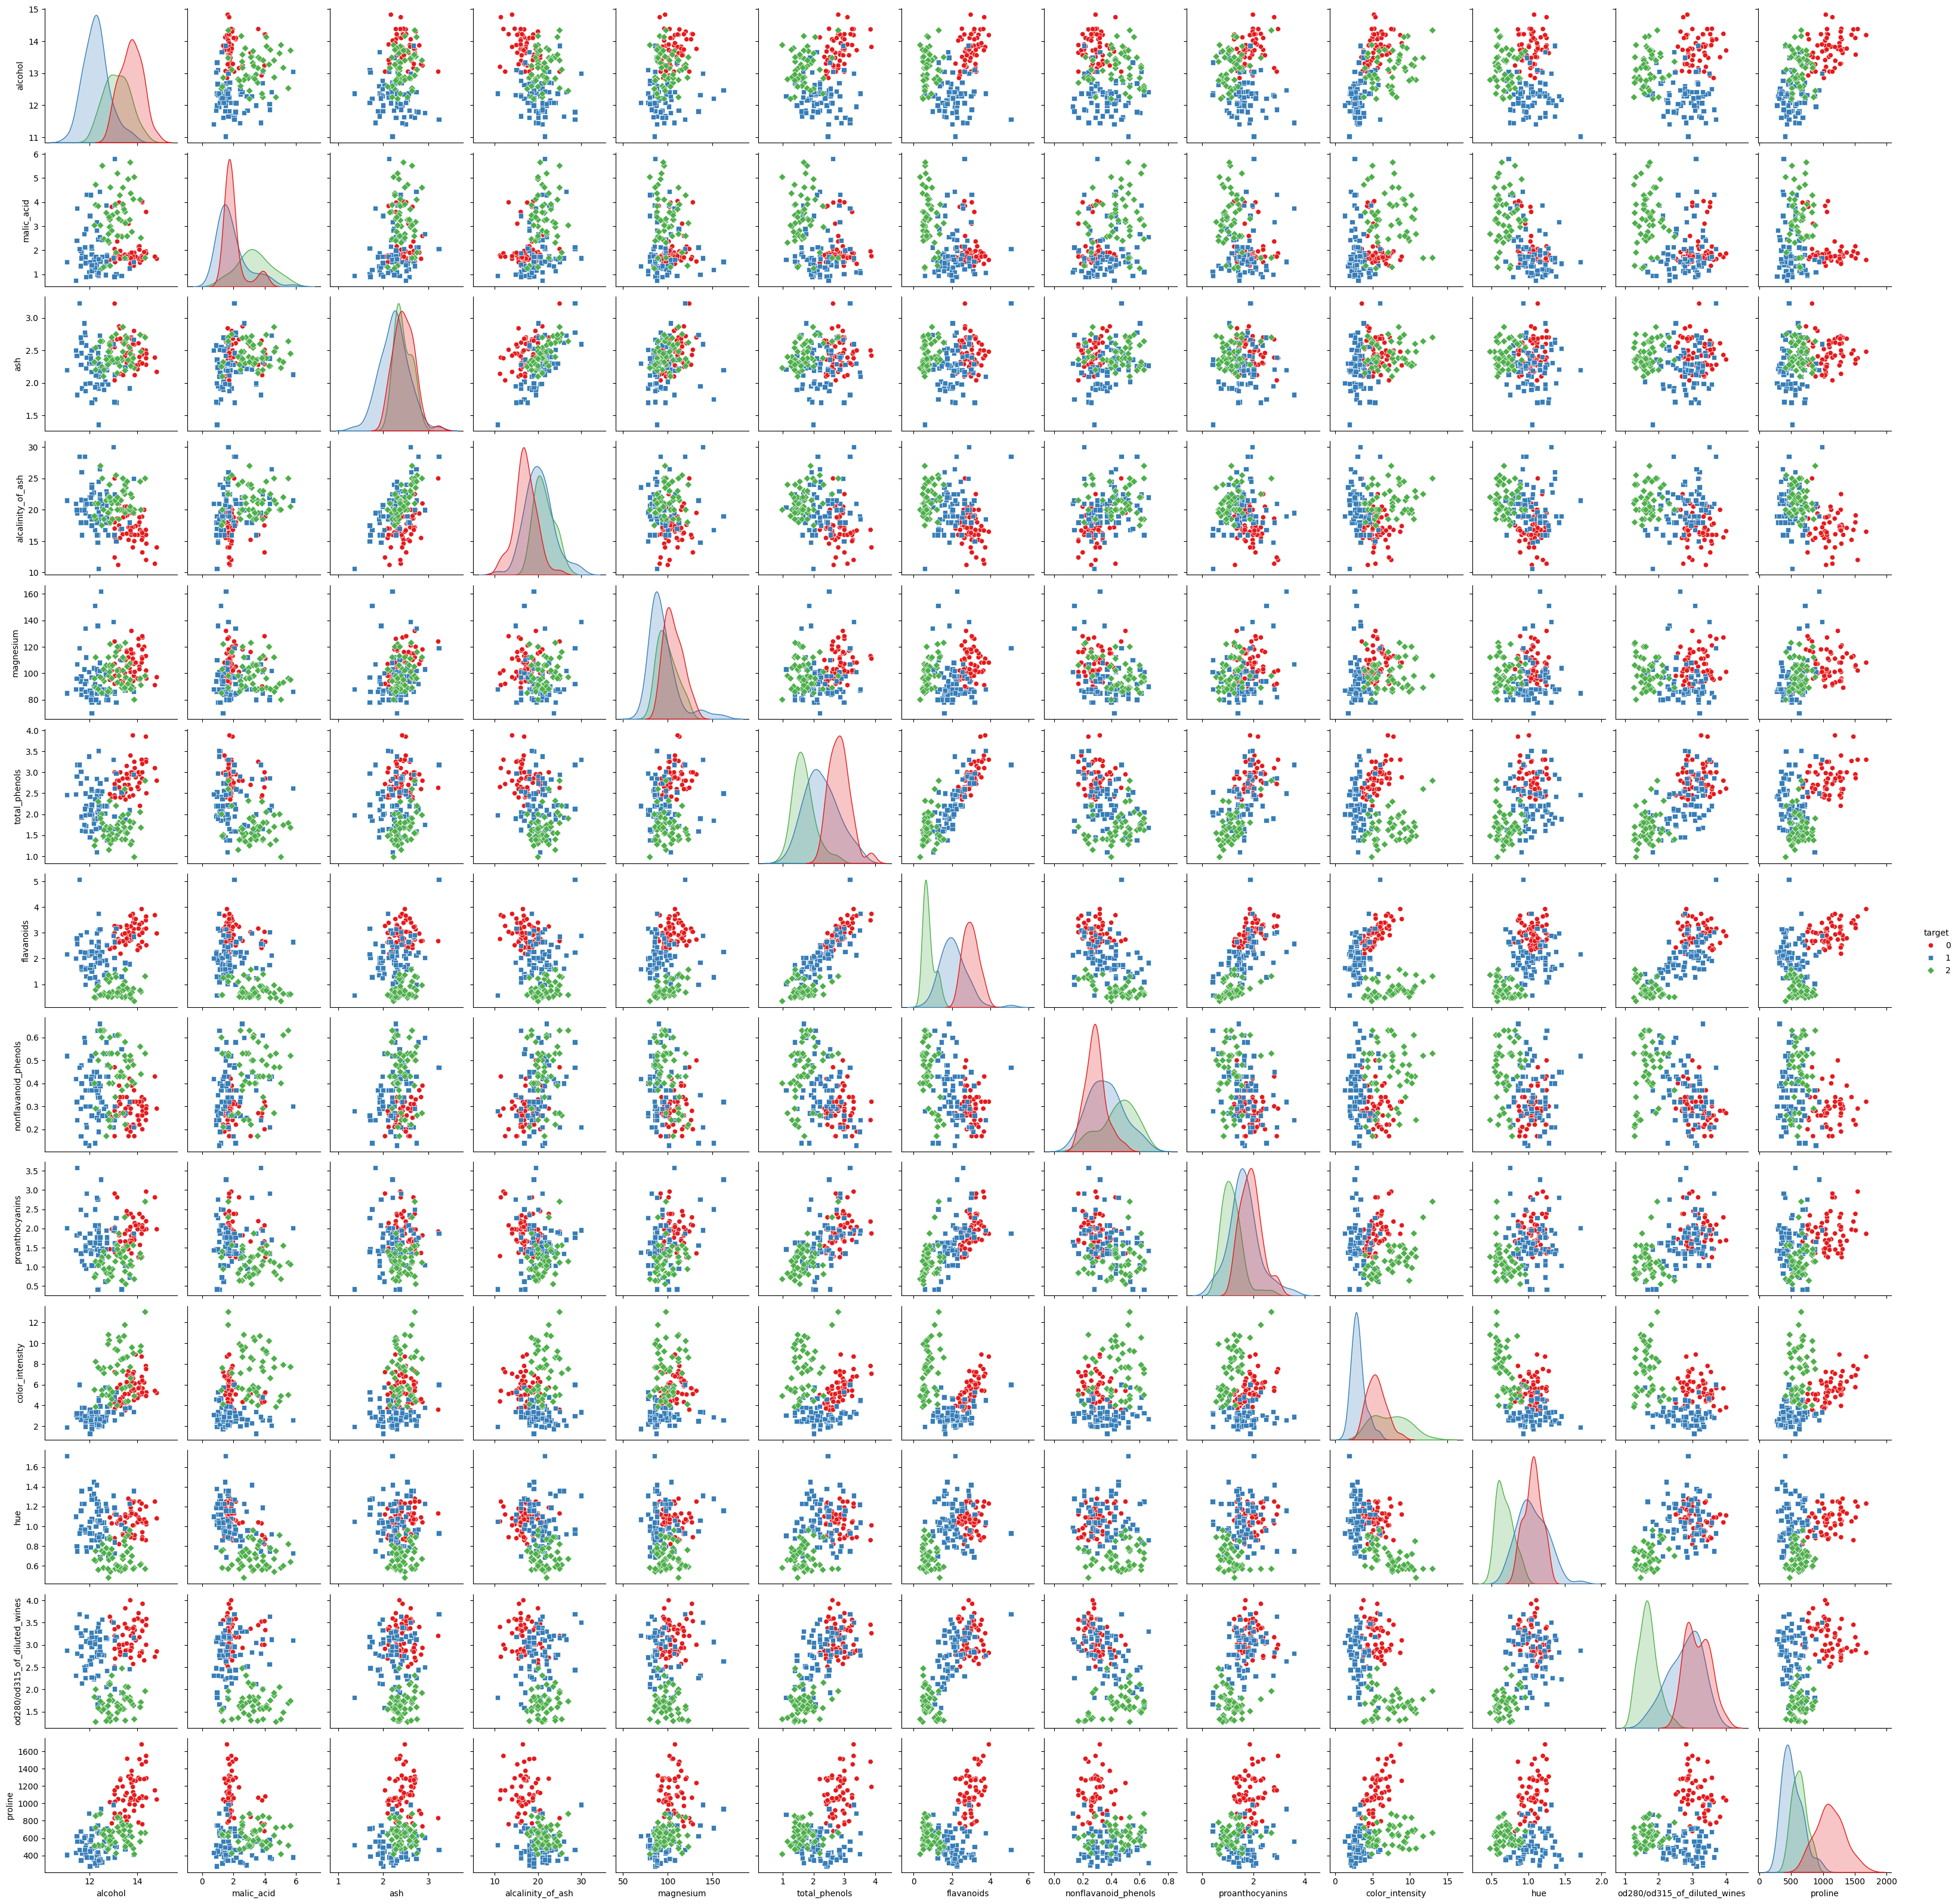

In [37]:
sns.pairplot(df, hue="target", palette="Set1", markers=["o", "s", "D"])
plt.show()

To find the important features in the Wine dataset, you can use several techniques depending on the model or method you're employing. Here's a step-by-step guide to determine feature importance:


To find the important features in the Wine dataset, you can use several techniques depending on the model or method you're employing. Here's a step-by-step guide to determine feature importance:

- **1. Using Random Forest Feature Importance:**
Random Forest provides a built-in method to calculate feature importance based on how much each feature reduces impurity in the decision trees.
- **2. Using Lasso Regularization (Linear Model):**
Lasso regression (L1 regularization) shrinks less important feature coefficients to zero, identifying the most important features.
- **3. Using PCA (Principal Component Analysis):**
Although PCA doesn’t directly give feature importance, it can show how much variance each principal component explains, indirectly highlighting important features.
- **4. Using Statistical Methods (Correlation Analysis):**
You can calculate the correlation between features and the target variable (if it's binary or ordinal) to determine which features are most related to the target.


**Using Random Forest Feature Importance**

                        features  importance
6                     flavanoids    0.194481
9                color_intensity    0.172961
0                        alcohol    0.141614
12                       proline    0.137045
11  od280/od315_of_diluted_wines    0.111831
10                           hue    0.076939
5                  total_phenols    0.035080
1                     malic_acid    0.033060
3              alcalinity_of_ash    0.029885
4                      magnesium    0.025873
8                proanthocyanins    0.018387
2                            ash    0.015534
7           nonflavanoid_phenols    0.007310


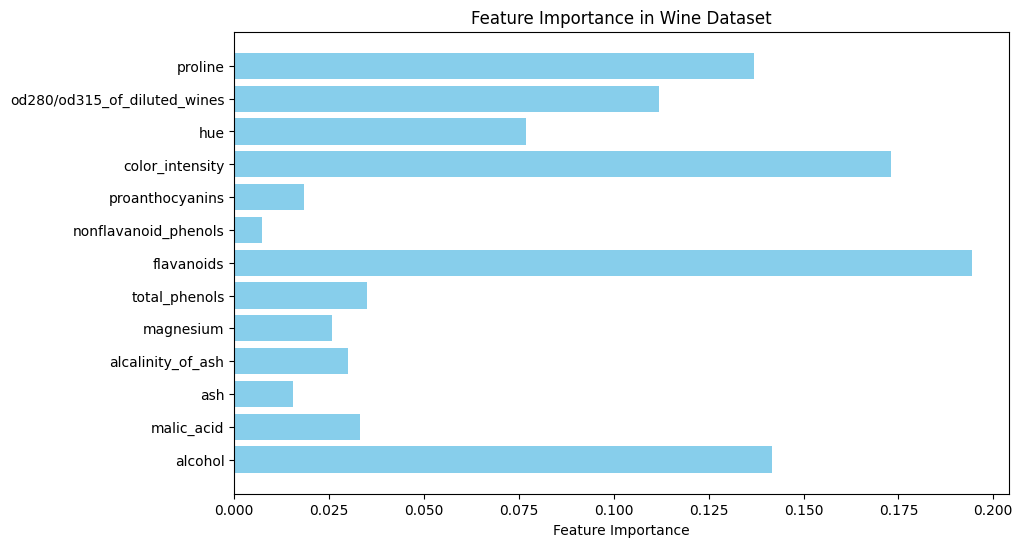

In [38]:
# Train a Random Forest Classifier
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X, y)

# Get feature importance
importance = model_rf.feature_importances_
features = df.columns[:-1]
importance_features = pd.DataFrame()
importance_features['features']=features
importance_features['importance']=importance
importance_features.sort_values(by='importance',ascending=False,inplace=True)
print(importance_features)
plt.figure(figsize=(10, 6))
plt.barh(features, importance, color="skyblue")
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Wine Dataset")
plt.show()


**Using Statistical Methods (Correlation Analysis)**

alcohol                        -0.328222
malic_acid                      0.437776
ash                            -0.049643
alcalinity_of_ash               0.517859
magnesium                      -0.209179
total_phenols                  -0.719163
flavanoids                     -0.847498
nonflavanoid_phenols            0.489109
proanthocyanins                -0.499130
color_intensity                 0.265668
hue                            -0.617369
od280/od315_of_diluted_wines   -0.788230
proline                        -0.633717
Name: target, dtype: float64


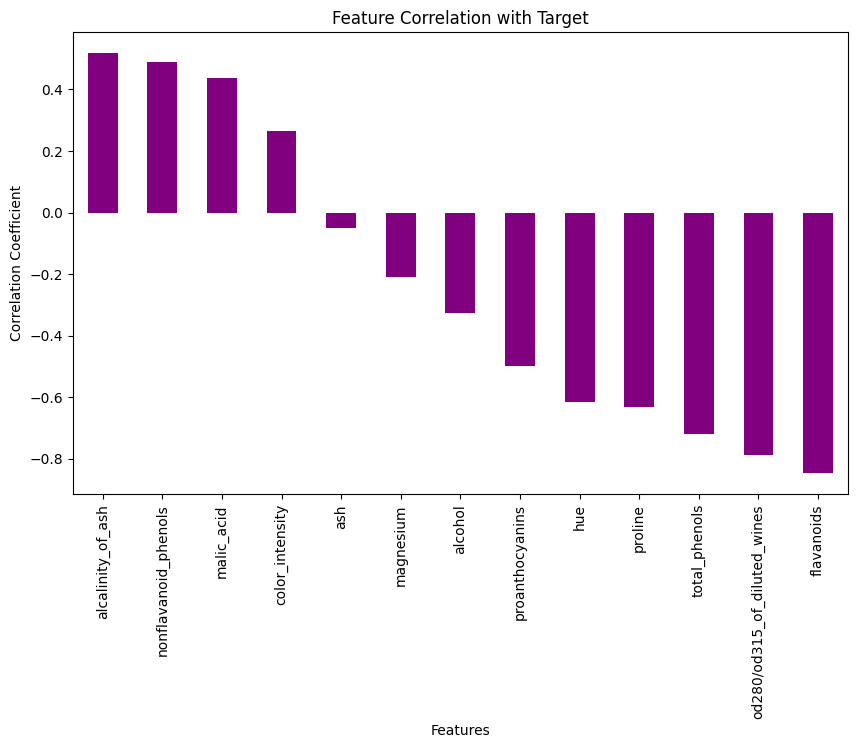

In [39]:
# Compute correlation with the target
correlation = df.corr()['target'][:-1]
print(correlation)
# Plot correlation
plt.figure(figsize=(10, 6))
correlation.sort_values(ascending=False).plot(kind="bar", color="purple")
plt.title("Feature Correlation with Target")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.show()

**Using Lasso Regularization (Linear Model):**

Lasso Regression (Least Absolute Shrinkage and Selection Operator) is a type of linear regression that uses L1 regularization. It adds a penalty equal to the absolute value of the coefficients to the loss function, which encourages sparsity in the model by shrinking some coefficients to exactly zero. This makes Lasso useful for feature selection in datasets with many features.

[0.50228695 0.76883766 0.52998484 0.30553075 0.01652004 0.
 1.90930324 0.         0.21928909 1.0139417  0.31538565 0.58694062
 0.0097563 ]
                         Feature  Importance
6                     flavanoids    1.909303
9                color_intensity    1.013942
1                     malic_acid    0.768838
11  od280/od315_of_diluted_wines    0.586941
2                            ash    0.529985
0                        alcohol    0.502287
10                           hue    0.315386
3              alcalinity_of_ash    0.305531
8                proanthocyanins    0.219289
4                      magnesium    0.016520
12                       proline    0.009756
5                  total_phenols    0.000000
7           nonflavanoid_phenols    0.000000


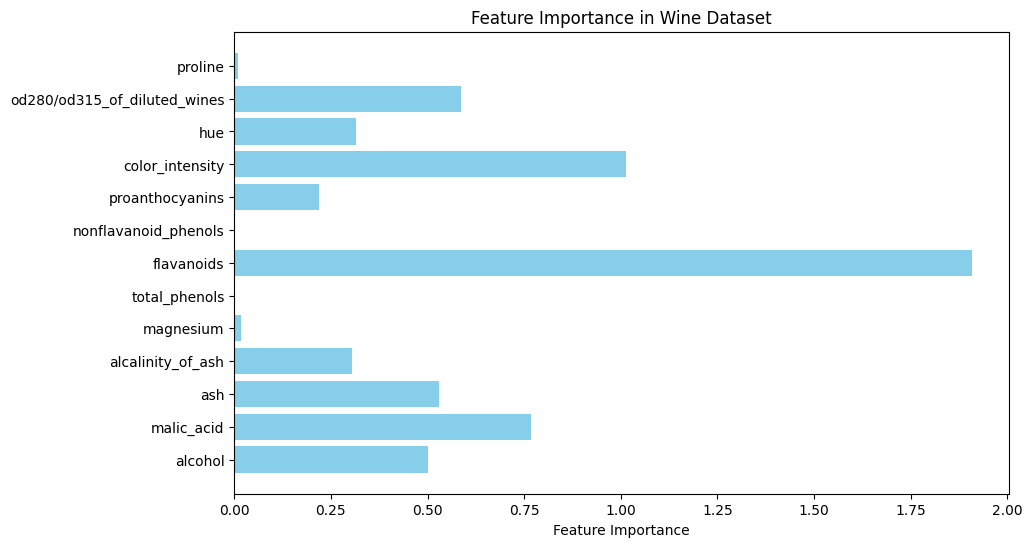

In [40]:
lasso = LogisticRegression(penalty='l1', solver='liblinear', random_state=42, max_iter=1000, multi_class='ovr')
lasso.fit(X, y)
importance = np.abs(lasso.coef_).mean(axis=0)
print(importance)
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print(feature_importance)
plt.figure(figsize=(10, 6))
plt.barh(features, importance, color="skyblue")
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Wine Dataset")
plt.show()

In [41]:
# lets find the important features
selected_features = feature_importance[feature_importance['Importance']>0.50]['Feature'].values
selected_features =list(selected_features)
selected_features.append('target')
df[selected_features]

,flavanoids,color_intensity,malic_acid,od280/od315_of_diluted_wines,ash,alcohol,target
0,3.06,5.64,1.71,3.92,2.43,14.23,0
1,2.76,4.38,1.78,3.40,2.14,13.20,0
2,3.24,5.68,2.36,3.17,2.67,13.16,0
3,3.49,7.80,1.95,3.45,2.50,14.37,0
4,2.69,4.32,2.59,2.93,2.87,13.24,0
...,...,...,...,...,...,...,...
173,0.61,7.70,5.65,1.74,2.45,13.71,2
174,0.75,7.30,3.91,1.56,2.48,13.40,2
175,0.69,10.20,4.28,1.56,2.26,13.27,2
176,0.68,9.30,2.59,1.62,2.37,13.17,2


**Decision Tree**

Accuracy on Train Data: 1.0
Accuracy on Test Data: 0.9444444444444444
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.88      1.00      0.93        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



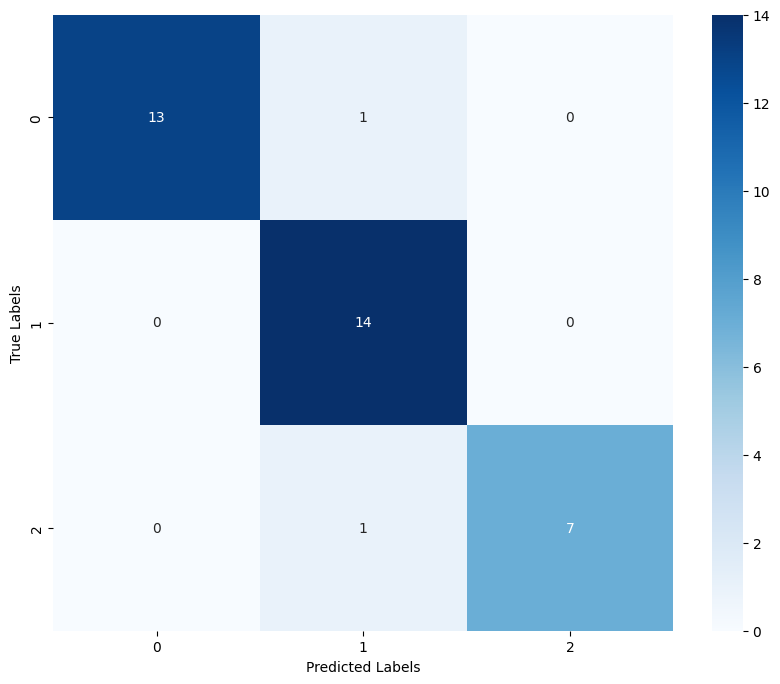

In [42]:
X = df.drop('target',axis=1)
y =df['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)


model_tree =DecisionTreeClassifier()
model_tree.fit(X_train,y_train)
y_pred = model_tree.predict(X_test)
y_train_pred = model_tree.predict(X_train)

print(f"Accuracy on Train Data: {accuracy_score(y_train,y_train_pred)}")
print(f"Accuracy on Test Data: {accuracy_score(y_test,y_pred)}")

print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

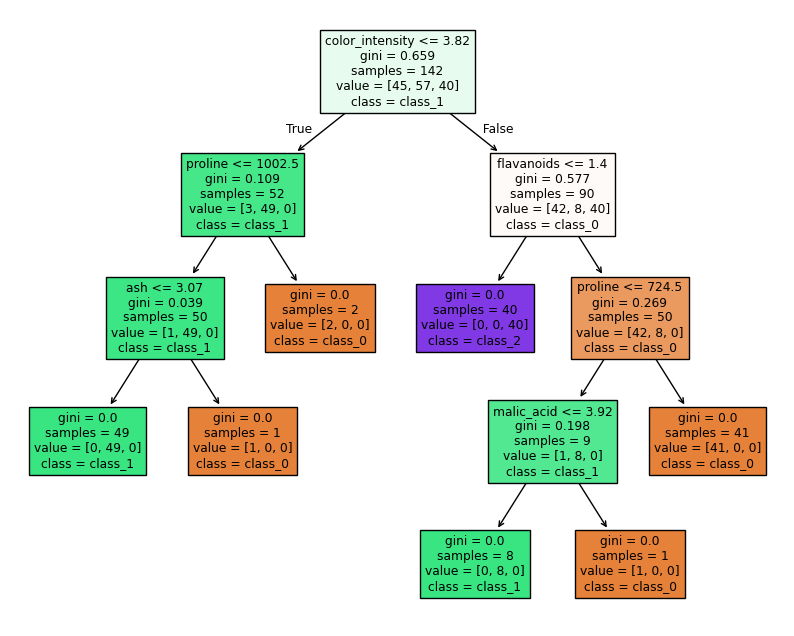

In [43]:
# plot the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8))
plot_tree(model_tree,filled=True,feature_names=feature_names,class_names=target_names)
plt.show()

In [44]:
from sklearn.model_selection import GridSearchCV

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search_model = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search_model.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search_model.best_params_)

# Get the best model
best_model = grid_search_model.best_estimator_

# Predict with the best model
y_pred = best_model.predict(X_test)

# Evaluate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Accuracy on test set: 0.9166666666666666


**Random Forest**

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search_rf_model = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search_rf_model.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search_rf_model.best_params_)

# Get the best model
best_model = grid_search_rf_model.best_estimator_

# Predict with the best model
y_pred = best_model.predict(X_test)

# Evaluate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10}
Accuracy on test set: 0.9722222222222222
